In [1]:
%run functions_wiki.py

In [2]:
page = get_page("Apple_Inc.")
revisions = get_page_sub(page, "revisions")

current page url https://en.wikipedia.org/wiki/Apple_Inc.


In [3]:
revisions.head()

,_content_model,_parent_id,_sha1,anon,comment,minor,revid,rollbacktoken,text,timestamp,user
0,wikitext,808089949,f5546f3b4ce54cf23b9bbbd1f9eb01382fd73a62,False,Undid revision 808089949 by [[Special:Contribu...,False,808110350,None,None,2017-10-31 23:02:31,Mildly Mad
1,wikitext,807527923,2e860ddbada13574e4f95de03a332101efd578ce,False,Information brokering should be in opening par...,False,808089949,None,None,2017-10-31 20:30:24,Twillisjr
2,wikitext,807090849,f5546f3b4ce54cf23b9bbbd1f9eb01382fd73a62,False,/* References */ standard formatting,True,807527923,None,None,2017-10-28 15:11:21,Smuckola
3,wikitext,806192323,284b56996b691347e68f58b1d3770b53eb7662b2,False,/* Stores */ Fixed grammar issue.,True,807090849,None,None,2017-10-25 21:01:25,Justin Dwyer
4,wikitext,806189577,f460d800a8dcb8cddb582d3fe787f3f62a264ea1,False,Reverted [[WP:AGF|good faith]] edits by [[Spec...,False,806192323,None,None,2017-10-20 09:49:12,Smuckola


In [9]:
test_user_set = set(revisions['user'].value_counts()[:50].index)  # top 50 contributors as test user group 

# calculate pair-wise user burst correlations 

In [10]:
result = {}
for user in test_user_set:
    burst, submission = cal_burstiness_window(revisions, username=user)
    result[user] = {'bursts': burst, 'submission': submission}


  return n/db/n.sum(), bins




  return n/db/n.sum(), bins




In [70]:
a = pd.DataFrame([result[c]['bursts'] for c in test_user_set], index = test_user_set).T
corr = a.corr()

In [71]:
corr

,AnomieBOT,Walafrid,ZimZalaBim,Terrillja,Michaelmas1957,AlistairMcMillan,Atlant,DKqwerty,Bumm13,Mono,...,Perardi,Gwernol,ClueBot NG,Psantora,Seidenstud,Adderz91,Zziccardi,ClueBot,Orangemike,ArnoldReinhold
AnomieBOT,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walafrid,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,-0.552424,-0.978768,NaN,-0.155186,NaN,NaN,NaN,NaN,-0.979191,0.997988
ZimZalaBim,NaN,NaN,1.000000,1.000000,NaN,-1.000000,NaN,-1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.440934,-0.840432,NaN,NaN,0.716367,0.950957,NaN
Terrillja,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.305645,...,NaN,NaN,NaN,0.363952,NaN,NaN,NaN,0.689561,NaN,NaN
Michaelmas1957,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlistairMcMillan,NaN,1.000000,-1.000000,NaN,NaN,1.000000,-0.481175,NaN,NaN,NaN,...,0.897287,-1.000000,NaN,0.747722,NaN,NaN,NaN,NaN,NaN,-0.647225
Atlant,NaN,NaN,NaN,NaN,NaN,-0.481175,1.000000,NaN,NaN,NaN,...,1.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000
DKqwerty,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,-0.969003,NaN,NaN
Bumm13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mono,NaN,NaN,NaN,0.305645,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Try cluster user group 

In [13]:
from sklearn.cluster import SpectralClustering

In [15]:
sc = SpectralClustering(affinity='precomputed', n_clusters=5)
sc.fit(corr.fillna(0).applymap(abs))
labels = sc.labels_

In [26]:
sorted(zip(labels,corr.columns.tolist()))

[(0, 'AlistairMcMillan'),

 (0, 'AntiVandalBot'),

 (0, 'ArnoldReinhold'),

 (0, 'Atlant'),

 (0, 'Bbatsell'),

 (0, 'Guy Harris'),

 (0, 'Gwernol'),

 (0, 'JoshuacUK'),

 (0, 'Kindall'),

 (0, 'Mmoneypenny'),

 (0, 'Orangemike'),

 (0, 'Perardi'),

 (0, 'Pitamakan'),

 (0, 'Psantora'),

 (0, 'Walafrid'),

 (0, 'Warren'),

 (0, 'Zeeboid'),

 (1, 'Adderz91'),

 (1, 'Anthony22'),

 (1, 'Bumm13'),

 (1, 'GRAHAMUK'),

 (1, 'Jasonanaggie'),

 (1, 'Joshuagross'),

 (1, 'LocalNet'),

 (1, 'Mepolypse'),

 (1, 'Nneonneo'),

 (1, 'RadRafe'),

 (1, 'Satkara'),

 (1, 'Seidenstud'),

 (1, 'Sunray'),

 (1, 'Yobot'),

 (2, 'ClueBot'),

 (2, 'DKqwerty'),

 (2, 'Eraserhead1'),

 (2, 'HereToHelp'),

 (2, 'Kaiwhakahaere'),

 (2, 'Lars T.'),

 (2, 'Mono'),

 (2, 'Ryan Norton'),

 (2, 'SmackBot'),

 (2, 'Terrillja'),

 (2, 'ZimZalaBim'),

 (3, 'Kkm010'),

 (3, 'Phil A. Fry'),

 (3, 'Soulparadox'),

 (3, 'Zziccardi'),

 (4, 'AnomieBOT'),

 (4, 'ClueBot NG'),

 (4, 'Darrell Greenwood'),

 (4, 'Michaelmas1957

In [16]:
index = [c[1] for c in sorted(zip(labels,corr.columns.tolist()))]

In [19]:
corr.ix[index,index].to_clipboard()   # copy correlation matrix to excel 

In [27]:
# # check correlations 
# mask_time = (revisions['timestamp'] > pd.to_datetime('2012-09-06')) & (revisions['timestamp']<pd.to_datetime('2012-11-06'))

# mask = revisions['user'] == 'Kkm010'
# revisions[mask & mask_time]

# mask = revisions['user'] == 'Soulparadox'
# revisions[mask&mask_time]

# a.T[['Kkm010', 'Soulparadox']].dropna(how='all')

In [31]:
# label user's contributions 
pd.Series(index).map(revisions['user'].value_counts()).to_clipboard()

# average bursts/contributions of each cluster

In [75]:
tmp = pd.DataFrame(index)
tmp.columns = ['user']
tmp['contributions'] = tmp['user'].map(revisions['user'].value_counts())
tmp['bursts_corr'] = tmp['user'].map(corr.fillna(0).applymap(abs).sum(axis=1))
tmp['label'] = tmp['user'].map(pd.Series(labels, index = corr.index))
tmp.groupby('label').agg({'contributions': [np.max, np.min, np.mean], 'bursts_corr': [np.max, np.min, np.mean]})

contributions                 bursts_corr                     

               amax amin       mean        amax      amin       mean

label                                                               

0               124   24  51.470588   18.276028  6.948149  11.739049

1                93   23  45.500000    8.927810  0.000000   2.063566

2               197   28  61.000000   17.286003  4.707107   9.420038

3                98   26  53.250000    4.902403  2.000000   3.225601

4                46   25  33.000000    4.086519  1.826352   2.888777

# plot cluster's burst

In [41]:
revisions['cluster'] = revisions['user'].map(pd.Series(labels, index = corr.index))

In [58]:
cluster_result = {}
for i in range(0,5):
    mask = revisions['cluster'] == i
    cset = set(revisions['user'][mask])
    print(i,cset)
    b, s = cal_burstiness_window(revisions, username=cset)
    cluster_result[i] = {'burst': b, 'submission':s}


  return n/db/n.sum(), bins




  return n/db/n.sum(), bins




0 {'Warren', 'JoshuacUK', 'Guy Harris', 'Walafrid', 'Bbatsell', 'Perardi', 'Zeeboid', 'Gwernol', 'Atlant', 'Psantora', 'AlistairMcMillan', 'Mmoneypenny', 'Kindall', 'AntiVandalBot', 'Orangemike', 'Pitamakan', 'ArnoldReinhold'}

1 {'RadRafe', 'Nneonneo', 'Jasonanaggie', 'Anthony22', 'Seidenstud', 'LocalNet', 'Bumm13', 'Sunray', 'Satkara', 'Adderz91', 'Yobot', 'Joshuagross', 'Mepolypse', 'GRAHAMUK'}

2 {'Eraserhead1', 'Kaiwhakahaere', 'ZimZalaBim', 'Terrillja', 'Lars T.', 'Ryan Norton', 'DKqwerty', 'SmackBot', 'Mono', 'HereToHelp', 'ClueBot'}

3 {'Phil A. Fry', 'Zziccardi', 'Kkm010', 'Soulparadox'}

4 {'Michaelmas1957', 'Darrell Greenwood', 'AnomieBOT', 'ClueBot NG'}


In [59]:
cluster_bursts = pd.concat([cluster_result[c]['burst'] for c in range(0,5)],1)

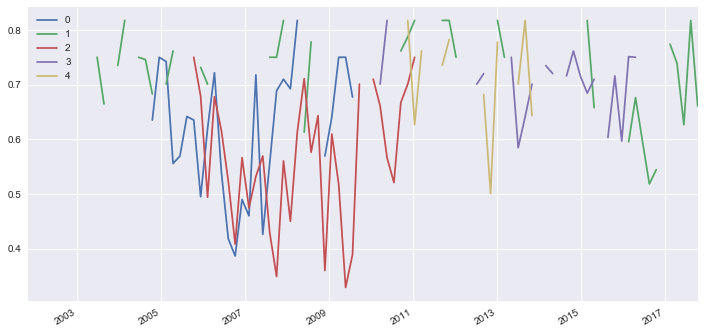

In [60]:
cluster_bursts.plot()
plt.show()

# Summary 
- User's burst do correlate;
- Users can be divided into user groups that who in one group tend to burst together; 
- Group with higher average user burst correlations tend to have higher average contributions.


In [77]:
# data backup 
tmp.to_csv("test_user_burst_corr.csv", index=None)